In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import pandas as pd

In [2]:
path = '/glade/work/jhenao/atm746/WPS/'

In [4]:
ds = xr.open_dataset(path + "geo_em.d01.nc")

In [22]:
# check the dataset info
ds

<xarray.Dataset> Size: 23MB
Dimensions:     (Time: 1, south_north: 129, west_east: 149,
                 south_north_stag: 130, west_east_stag: 150, land_cat: 21,
                 soil_cat: 16, month: 12, num_urb_params: 132,
                 dust_erosion_dimension: 3)
Dimensions without coordinates: Time, south_north, west_east, south_north_stag,
                                west_east_stag, land_cat, soil_cat, month,
                                num_urb_params, dust_erosion_dimension
Data variables: (12/82)
    Times       (Time) |S19 19B ...
    XLAT_M      (Time, south_north, west_east) float32 77kB 20.5 20.55 ... 53.12
    XLONG_M     (Time, south_north, west_east) float32 77kB -144.6 ... -91.16
    XLAT_V      (Time, south_north_stag, west_east) float32 77kB ...
    XLONG_V     (Time, south_north_stag, west_east) float32 77kB ...
    XLAT_U      (Time, south_north, west_east_stag) float32 77kB ...
    ...          ...
    OA4SS       (Time, south_north, west_east) float32 77kB ...
    OL1SS       (Time, south_north, west_east) float32 77kB ...
    OL2SS       (Time, south_north, west_east) float32 77kB ...
    OL3SS       (Time, south_north, west_east) float32 77kB ...
    OL4SS       (Time, south_north, west_east) float32 77kB ...
    BATHYMETRY  (Time, south_north, west_east) float32 77kB ...
Attributes: (12/56)
    TITLE:                           OUTPUT FROM GEOGRID V4.6.0
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        150
    SOUTH-NORTH_GRID_DIMENSION:      130
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_IMPERV:                     1
    FLAG_CANFRA:                     1
    FLAG_EROD:                       1
    FLAG_CLAYFRAC:                   1
    FLAG_SANDFRAC:                   1
    FLAG_BATHYMETRY:                 1

In [9]:
ds.HGT_M

<xarray.DataArray 'HGT_M' (Time: 1, south_north: 129, west_east: 149)> Size: 77kB
[19221 values with dtype=float32]
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    units:        meters MSL
    description:  GMTED2010 30-arc-second topography height
    stagger:      M
    sr_x:         1
    sr_y:         1

In [23]:
# get coordinates and terrain height
lon = ds.XLONG_M.squeeze()
lat = ds.XLAT_M.squeeze()
hgt = ds.HGT_M.squeeze()

### lets plot the terrain of the domain

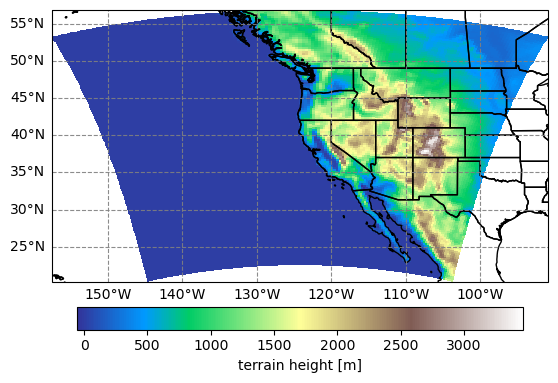

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# plot terrain height
cf = ax.pcolormesh(lon, lat, hgt, cmap='terrain', transform=ccrs.PlateCarree())

# add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.STATES)

grid = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                    color='gray', alpha=0.9, linestyle='--')
grid.top_labels = False
grid.right_labels = False

cbar = fig.colorbar(cf, ax=ax, orientation='horizontal', pad=0.07, shrink=0.9)
cbar.set_label('terrain height [m]')  # Customize label as needed

plt.show()

### Check projection impacts

Check projections here https://www2.mmm.ucar.edu/wrf/users/wrf_users_guide/build/html/wps.html

Commonly used projections:

- **lambert** for midlatitudes
- **mercator** for the tropics
- **polar** for high latitudes

#### The resolution specified in the namelist is the nominal resolution, but due to map projections the actual resolution is different to dx

map factor = dx_namelist / dx_real

- if map factor > 1.0, the real dx is smaller than the specified dx. Take it into account for **dt**
- if map factor < 1.0, the real dx is larger than the specified dx. You have a lower resolution



In [36]:
# we can check this using the map factors

mf = ds.MAPFAC_M.squeeze()


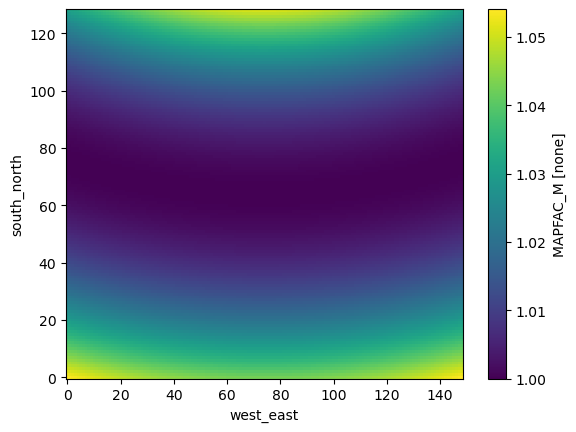

In [37]:
mf.plot()

In [47]:
dx = ds.attrs['DX']
print(f"Nominal resolution is {int(dx)} m")

Nominal resolution is 30000 m


In [42]:
# real dx is dx / map factor
real_dx = dx/mf


In [43]:
# the dimensions of the array are
real_dx.shape

(129, 149)

In [51]:
# max dx
dx_max = real_dx.values.max()

In [54]:
# min dx
dx_min = real_dx.values.min()

In [55]:
print(f"The max grid size is {int(dx_max)} and the min is {int(dx_min)}")

The max grid size is 30000 and the min is 28460
